In [1]:
import mne
from mne.io import read_raw
from mne.stats import permutation_cluster_test
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
import scipy
from copy import deepcopy
import pandas as pd

In [77]:
os.getcwd()
from functions.utils import _get_onedrive_path
from functions.plotting import plot_raw_stim, plot_psd_log, plot_stft, plot_mean_stft_trials, plot_power_comparison_between_conditions
from functions.preprocessing import find_slowest_GO_trials, find_idx_success_unsuccess, create_epochs_subsets

In [138]:
session_ID = 'sub006 DBS ON Rest'

In [139]:
working_path = os.path.dirname(os.getcwd())
onedrive_path = _get_onedrive_path()
subject_ID = session_ID.split(' ') [0]
condition = session_ID.split(' ') [1] + ' ' + session_ID.split(' ') [2]
sub_onedrive_path = join(onedrive_path, subject_ID)
sub_onedrive_path_synced = join(sub_onedrive_path, 'synced_data')
sub_onedrive_path_task = join(sub_onedrive_path_synced, session_ID)
filename = [f for f in os.listdir(sub_onedrive_path_task) if (
    f.endswith('.set') and f.startswith('SYNCHRONIZED_EXTERNAL'))]
file = join(sub_onedrive_path_task, filename[0])
raw = read_raw(file, preload=True)
#raw.apply_function(lambda x: x * 1e-6, picks=[0,1])

#  Set saving path
results_path = join(working_path, "results")
saving_path = join(results_path, session_ID)
if not os.path.isdir(saving_path):
    os.makedirs(saving_path)

In [ ]:
session_synced_data_path

In [140]:
raw = read_raw(file, preload=True)
#sf = round(raw.info['sfreq'])

In [141]:
raw.apply_function(lambda x: x * 1e-6)

<RawEEGLAB | SYNCHRONIZED_EXTERNAL_sub-006_ses-Rest_ON_task-Default_run-001_eeg (1).set, 42 x 996379 (486.5 s), ~319.3 MB, data loaded>

In [9]:
%matplotlib qt

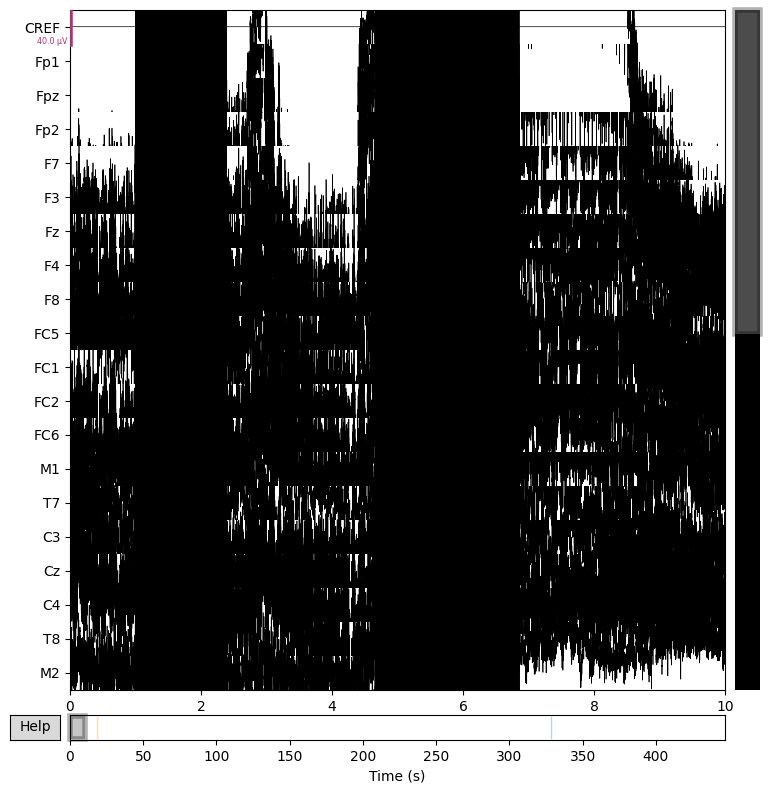

Channels marked as bad:
none


In [52]:
raw.plot()

In [ ]:
raw_data_path = join(subject_path, "raw_data")
raw_behav_data_path = join(raw_data_path, 'BEHAVIOR')
raw_behav_session_data_path = join(raw_behav_data_path, DBS_status)
mSST_raw_behav_session_data_path = join(raw_behav_session_data_path, 'mSST')

for filename in os.listdir(mSST_raw_behav_session_data_path):
        if filename.endswith(".csv"):
            fname = filename
            parts = filename.split('_')
            # Join the first three parts with underscores to create the session_ID
            session_ID = '_'.join(parts[:3])
filepath = join(mSST_raw_behav_session_data_path, fname)
filepath

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
# return the index of the first row which is not filled by a Nan value:
start_task_index = df['blocks.thisRepN'].first_valid_index()
# Crop dataframe in 2 parts: before and after the task:
#df_training = df.iloc[:start_task_index]
df_maintask = df.iloc[start_task_index:-1]

# remove the trials with early presses, as in these trials the cues were not presented
early_presses = df_maintask[df_maintask['early_press_resp.corr'] == 1]
early_presses_trials = list(early_presses.index)
number_early_presses = len(early_presses_trials)

# remove trials with early presses from the dataframe:
df_maintask_copy = df_maintask.drop(early_presses_trials)

In [142]:
list_name= raw.ch_names
list_type = raw.get_channel_types()


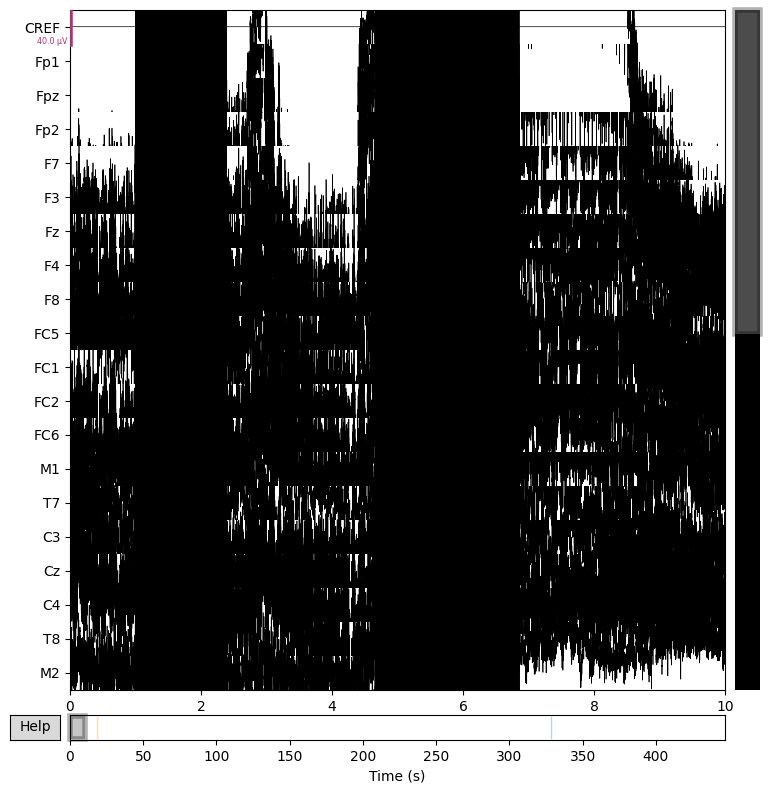

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [ ]:
raw.plot()

In [ ]:
list_name

In [143]:
list_type_updated = list_type.copy()
list_type_updated[0] = 'misc'
list_type_updated[41] = 'misc'
list_type_updated[40] = 'misc'
list_type_updated[39] = 'misc'
list_type_updated[38] = 'misc'
list_type_updated[37] = 'misc'
list_type_updated[36] = 'misc'
list_type_updated[35] = 'eog'
list_type_updated[34] = 'ecg'
list_type_updated[33] = 'stim'
raw.set_channel_types(dict(zip(list_name, list_type_updated)))

C:\Users\Juliette\AppData\Local\Temp\ipykernel_26440\3767487587.py:12: RuntimeWarning: The unit for channel(s) COUNTER, CREF, STATUS, TRIGGERS, X, Y, Z has changed from V to NA.
  raw.set_channel_types(dict(zip(list_name, list_type_updated)))


<RawEEGLAB | SYNCHRONIZED_EXTERNAL_sub-006_ses-Rest_ON_task-Default_run-001_eeg (1).set, 42 x 996379 (486.5 s), ~319.3 MB, data loaded>

In [144]:
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage)

<RawEEGLAB | SYNCHRONIZED_EXTERNAL_sub-006_ses-Rest_ON_task-Default_run-001_eeg (1).set, 42 x 996379 (486.5 s), ~319.3 MB, data loaded>

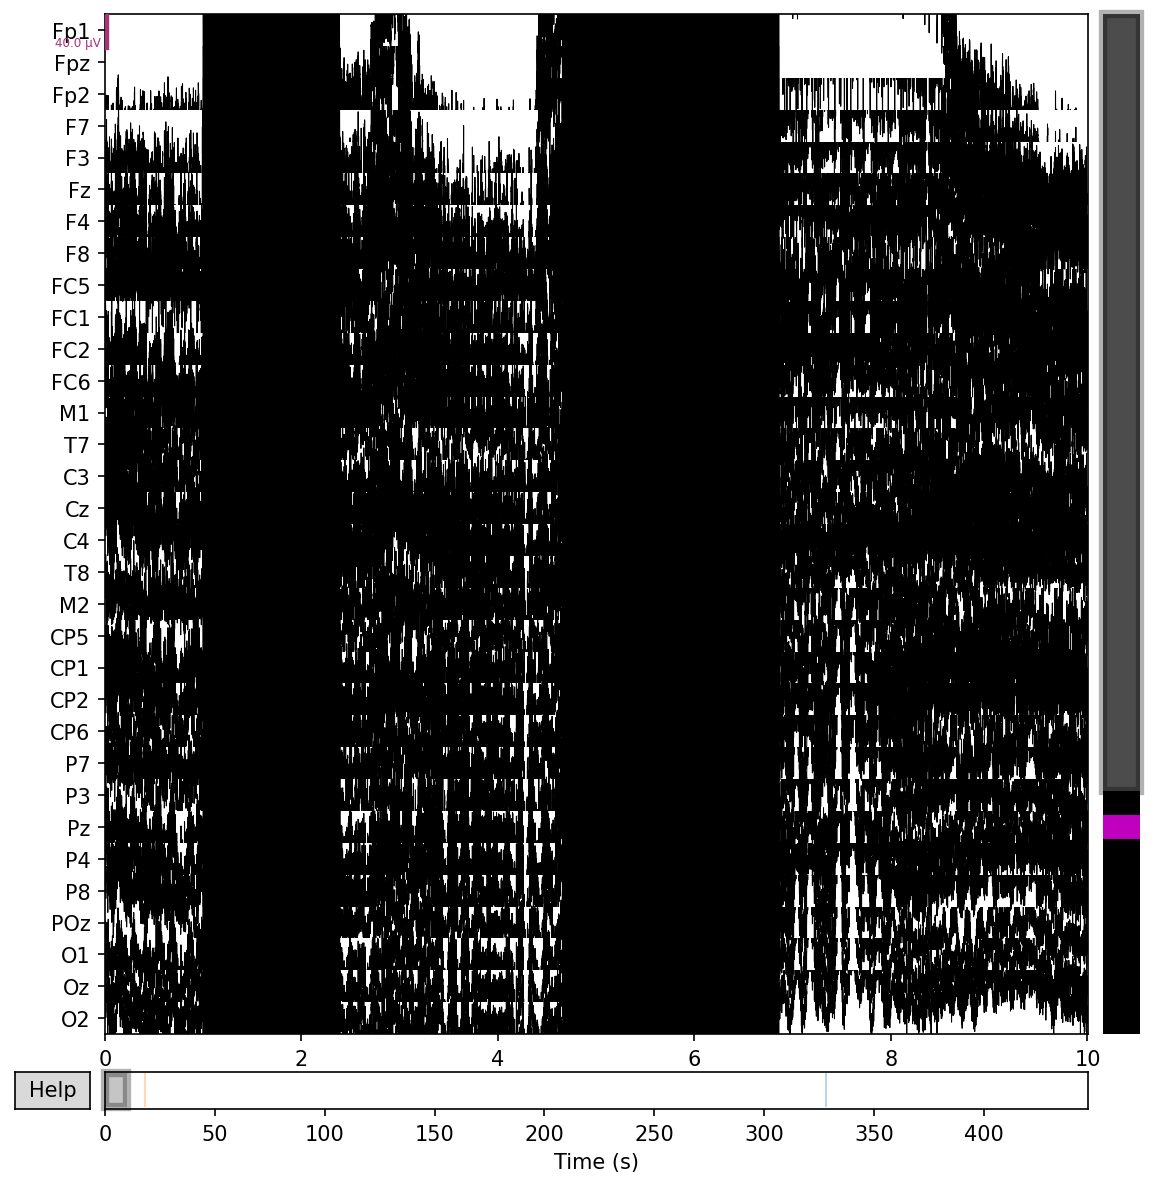

In [64]:
raw.plot(n_channels=32)

NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


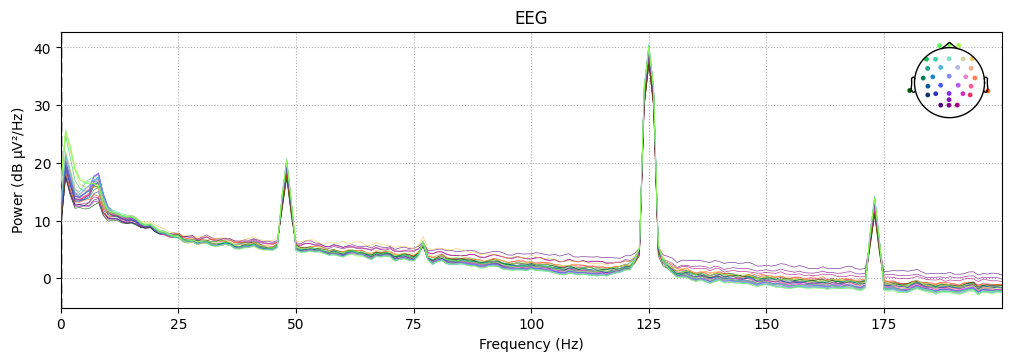

Channels marked as bad:
none
Channels marked as bad:
none


In [ ]:
mne.viz.plot_raw_psd(raw, fmax=200)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



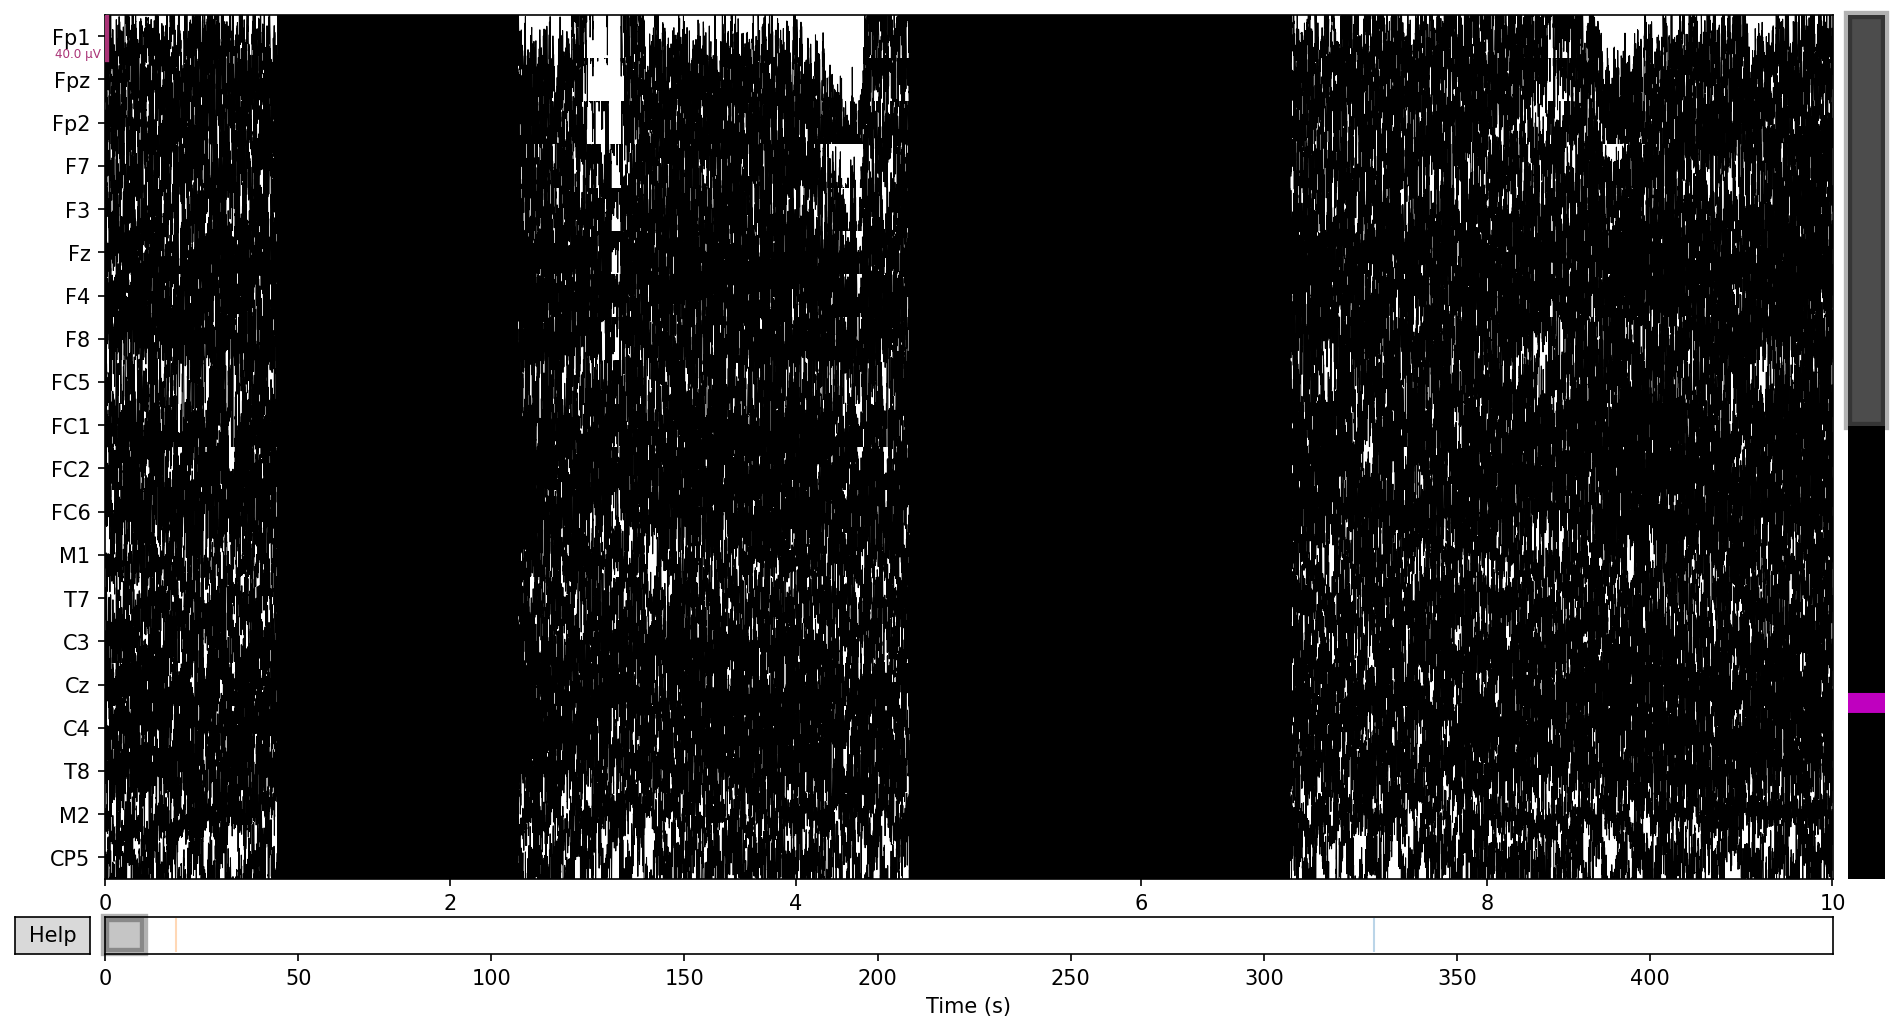

Channels marked as bad:
none


In [59]:
# Highpass filter at 1 Hz
highpass_filtered_raw = deepcopy(raw).filter(l_freq=1, h_freq=None)
highpass_filtered_raw.plot()

In [60]:
# Lowpass filter at 250 Hz
lowpass_filtered_raw = deepcopy(highpass_filtered_raw).filter(l_freq=None, h_freq=90)
#lowpass_filtered_raw.plot()

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 301 samples (0.147 s)



NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


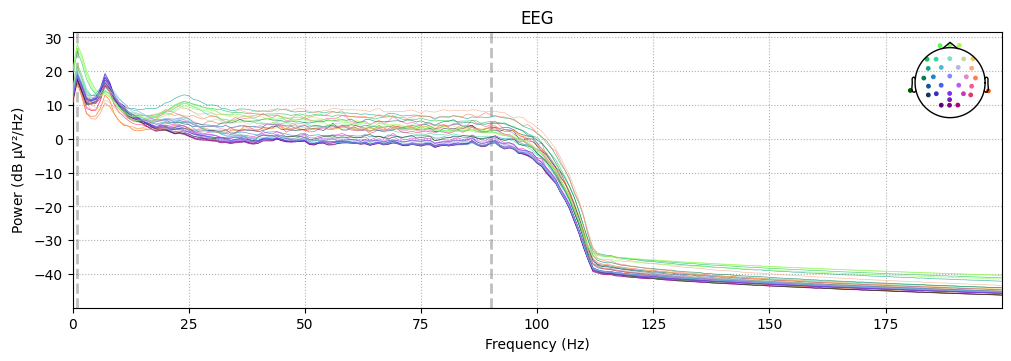

In [61]:
mne.viz.plot_raw_psd(lowpass_filtered_raw, fmax=200)

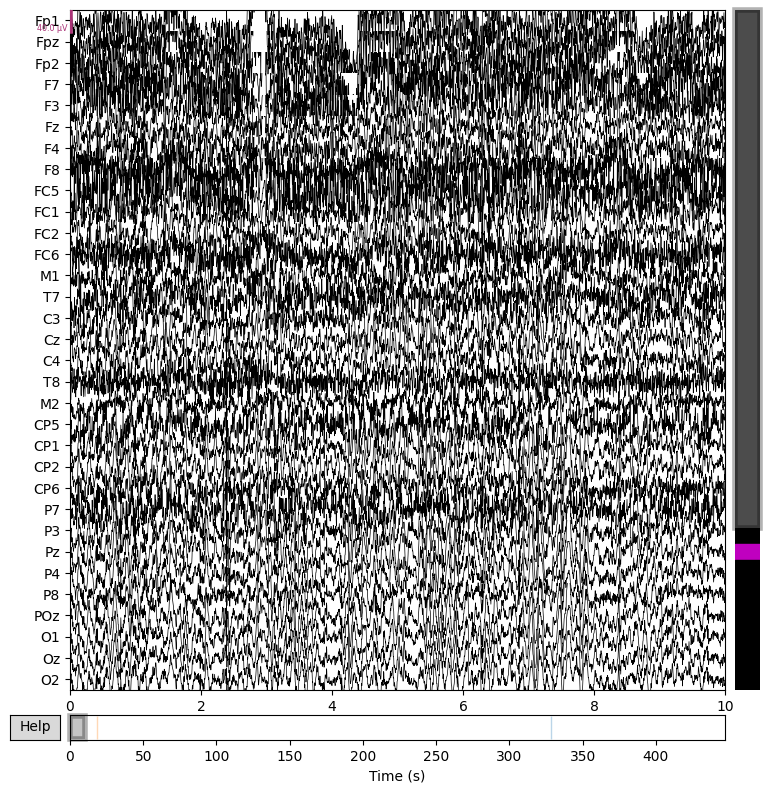

In [63]:
lowpass_filtered_raw.plot(n_channels=32)

In [44]:
notch_filtered_signal = deepcopy(lowpass_filtered_raw).notch_filter(freqs=np.arange(48, 125, 48))

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13517 samples (6.600 s)



NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


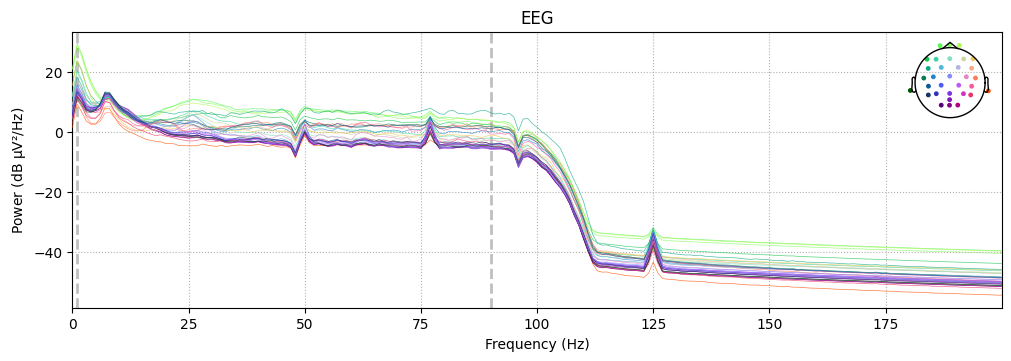

Channels marked as bad:
none


In [45]:
mne.viz.plot_raw_psd(notch_filtered_signal, fmax=200)

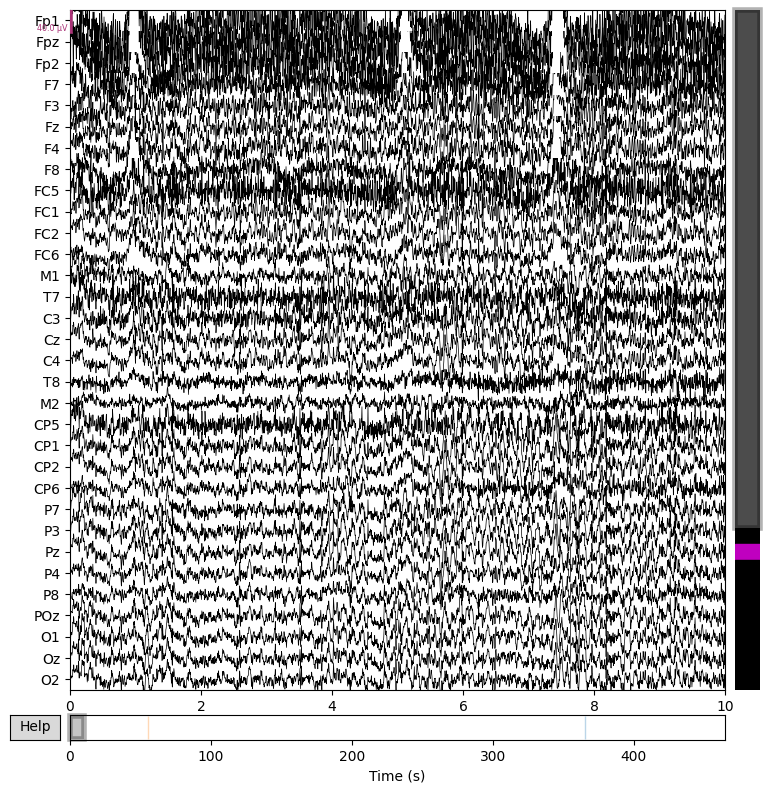

In [32]:
notch_filtered_signal.plot(n_channels=32)

In [ ]:
re_ref_signal = deepcopy(lowpass_filtered_raw) 
mne.set_eeg_reference(re_ref_signal, ref_channels='average')

In [ ]:
re_ref_signal.plot()

In [ ]:
mne.viz.plot_raw_psd(lowpass_filtered_raw, fmax=200)

In [ ]:
# Notch filter around 50 Hz (stop band)
notch_filtered_signal = deepcopy(lowpass_filtered_raw).notch_filter(freqs=np.arange(50, 125, 50))
notch_filtered_signal.plot()

In [ ]:
mne.viz.plot_raw_psd(notch_filtered_signal, fmax=125)

In [ ]:
events, event_dict = mne.events_from_annotations(re_ref_signal)
# List of keys to keep
keys_to_keep = ['GC', 'GF', 'GO', 'GS', 'continue', 'stop']

# Create the new dictionary by filtering the original one
filtered_event_dict = {key: event_dict[key] for key in keys_to_keep}

print(filtered_event_dict)
# Get the event codes (values) from the filtered dictionary
valid_event_codes = list(filtered_event_dict.values())

# Filter the events array where the event code is in the valid_event_codes list
filtered_events = np.array([event for event in events if event[2] in valid_event_codes])

print(filtered_events)
#picks = [raw.ch_names[0], raw.ch_names[1]]
tmin = -0.5
tmax = 1.5
epochs = mne.Epochs(re_ref_signal, filtered_events, event_id=filtered_event_dict, tmin=tmin, tmax=tmax, baseline=(None, 0), preload=True)
metadata = pd.DataFrame({'subject':[session_ID] * len(epochs)})
epochs.metadata = metadata

In [ ]:
(global_idx_go_trials_successful, global_idx_go_trials_unsuccessful,
global_idx_stop_trials_successful, global_idx_stop_trials_unsuccessful, 
global_idx_go_fast_trials_successful, global_idx_go_fast_trials_unsuccessful,
global_idx_go_continue_trials_successful, global_idx_go_continue_trials_unsuccessful,
mean_GO_RT_successful, mean_RT_unsuccessful_STOP,
mean_GF_RT_successful, mean_GC_RT_successful) = find_idx_success_unsuccess(df_maintask_copy, epochs)

In [ ]:
my_keys = ['GO/successful', 'GO/unsuccessful', 'GC/successful', 'GC/unsuccessful', 'GF/successful', 'GF/unsuccessful','GS/successful', 'GS/unsuccessful']
my_values = [10, 11, 12, 13, 14, 15, 16, 17]
for key,value in zip(my_keys, my_values):
    event_dict[key] = value

epochs.event_id = filtered_event_dict


In [ ]:
epochs = create_epochs_subsets(epochs, 
        filtered_event_dict, 
        global_idx_go_trials_successful, 
        global_idx_go_trials_unsuccessful, 
        global_idx_stop_trials_successful, 
        global_idx_stop_trials_unsuccessful, 
        global_idx_go_fast_trials_successful, 
        global_idx_go_fast_trials_unsuccessful, 
        global_idx_go_continue_trials_successful, 
        global_idx_go_continue_trials_unsuccessful)


In [ ]:
%matplotlib qt

In [ ]:
epochs['GF/successful'].average().plot()

In [ ]:
epochs

In [ ]:
# Generate list of evoked objects from conditions names
evokeds = [epochs[name].average() for name in ("GO/successful", "GF/successful","GC/successful", "GS/successful")]

In [ ]:
%matplotlib qt

In [ ]:
colors = "blue", "red", "green", "black"
title = "Evoked responses"

fig, axes = plt.subplots(1)

mne.viz.plot_evoked_topo(evokeds, title=title, background_color="w", axes=axes)

fig.savefig(join(saving_path, 'evoked_responses.pdf'))

In [ ]:
fig = notch_filtered_signal.plot_sensors(show_names=True)
fig.savefig(join(saving_path, 'sensors_location.pdf'))